In [15]:
!pip install mglearn

In [2]:
import pandas as pd
import numpy as np
import random
import os

from sklearn.linear_model import LogisticRegression

In [4]:
train = pd.read_csv('C:/Users/whals/OneDrive/바탕 화면/석사/Daycon/당뇨병/train.csv')
test = pd.read_csv('C:/Users/whals/OneDrive/바탕 화면/석사/Daycon/당뇨병/test.csv')

In [7]:
# 임신횟수, 포도당 농도, 혈압, 피부 두께, 인슐린, 체질량지수, 당뇨병 혈통 기능, 나이
train.head()

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,TRAIN_000,4,103,60,33,192,24.0,0.966,33,0
1,TRAIN_001,10,133,68,0,0,27.0,0.245,36,0
2,TRAIN_002,4,112,78,40,0,39.4,0.236,38,0
3,TRAIN_003,1,119,88,41,170,45.3,0.507,26,0
4,TRAIN_004,1,114,66,36,200,38.1,0.289,21,0


In [19]:
set(train['Outcome'])

{0, 1}

In [6]:
test.head()

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,TEST_000,5,112,66,0,0,37.8,0.261,41
1,TEST_001,3,107,62,13,48,22.9,0.678,23
2,TEST_002,3,113,44,13,0,22.4,0.140,22
3,TEST_003,6,190,92,0,0,35.5,0.278,66
4,TEST_004,1,107,72,30,82,30.8,0.821,24


# train set 독립변수/ 종속변수 나누기

In [8]:
x_train = train.drop(columns=['ID','Outcome'])
y_train = train['Outcome']

test = test.drop(columns=['ID'])

# 데이터 전처리

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_scaler = scaler.fit_transform(x_train)
test_scaler = scaler.fit_transform(test)

In [43]:
dataframe = pd.DataFrame(x_train, columns=x_train.columns)

In [17]:
import mglearn

array([[<AxesSubplot:xlabel='Pregnancies', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='Glucose', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='BloodPressure', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='SkinThickness', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='Insulin', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='BMI', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='Age', ylabel='Pregnancies'>],
       [<AxesSubplot:xlabel='Pregnancies', ylabel='Glucose'>,
        <AxesSubplot:xlabel='Glucose', ylabel='Glucose'>,
        <AxesSubplot:xlabel='BloodPressure', ylabel='Glucose'>,
        <AxesSubplot:xlabel='SkinThickness', ylabel='Glucose'>,
        <AxesSubplot:xlabel='Insulin', ylabel='Glucose'>,
        <AxesSubplot:xlabel='BMI', ylabel='Glucose'>,
        <AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Glucose'>,
        <AxesSubplot:xlabel='Age', ylabel='

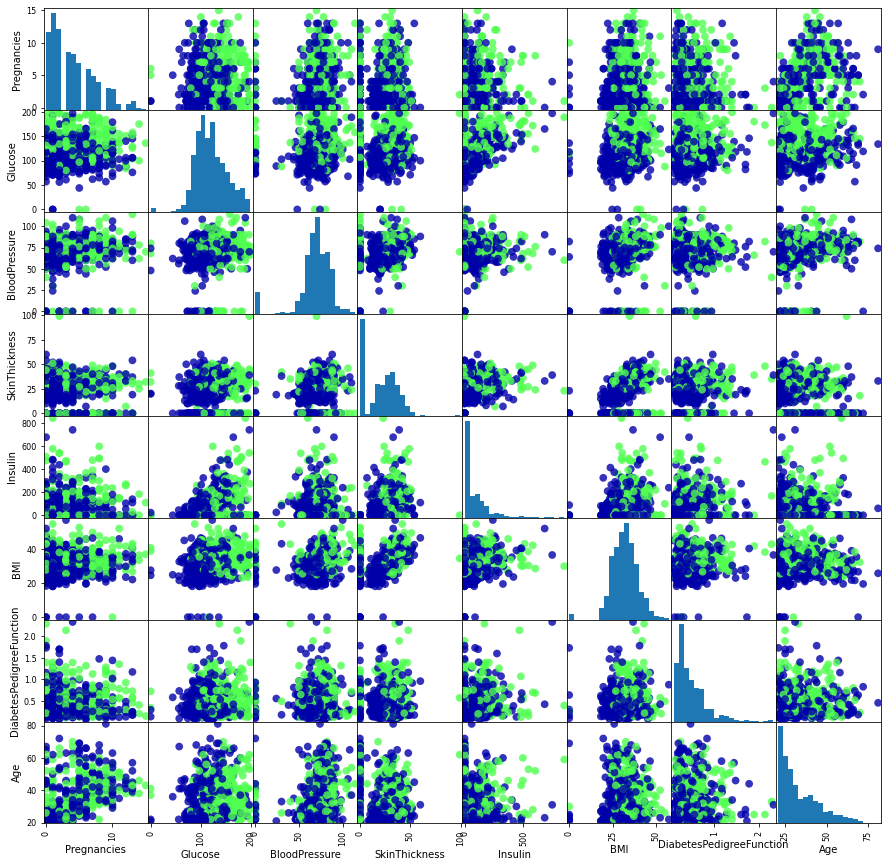

In [18]:
# 특성에 따라 구분이 잘 될 수 있겠다 없겠다를 관찰?
pd.plotting.scatter_matrix(dataframe, c=y_train, figsize=(15,15), marker='o',
                          hist_kwds={'bins':20}, s=60, alpha=.8, cmap=mglearn.cm3)

# 예측(K-최근접 알고리즘)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [45]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [46]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowsk',metric_params=None,
                    n_jobs=None, n_neighbors=1, p=2, weights='uniform')

KNeighborsClassifier(metric='minkowsk', n_neighbors=1)

In [91]:
y_pred = knn.predict(test)
print("테스트 세트에 대한 예측값:\n", y_pred)

테스트 세트에 대한 예측값:
 [1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0
 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1
 1 0 1 0 0]


C:\Users\whals\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# 예측(LogisticRegression)

In [56]:
lr = LogisticRegression(C=0.5)

In [57]:
lr.fit(train_scaler, y_train)

LogisticRegression(C=0.5)

In [96]:
predict = lr.predict(test_scaler)

In [97]:
predict

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0], dtype=int64)

# 모델 평가하기

In [83]:
print("k최근접 세트의 정확도:{:.2f}".format(np.mean(y_pred == y_train)))

k최근접 세트의 정확도:1.00


In [86]:
print("로지스틱 세트의 정확도:{:.2f}".format(np.mean(predict == y_train)))

로지스틱 세트의 정확도:0.78


In [89]:
submit = pd.read_csv('C:/Users/whals/OneDrive/바탕 화면/석사/Daycon/당뇨병/sample_submission.csv')

In [98]:
submit['Outcome'] = predict

In [100]:
submit.to_csv('C:/Users/whals/OneDrive/바탕 화면/석사/Daycon/당뇨병/submit.csv', index = False)